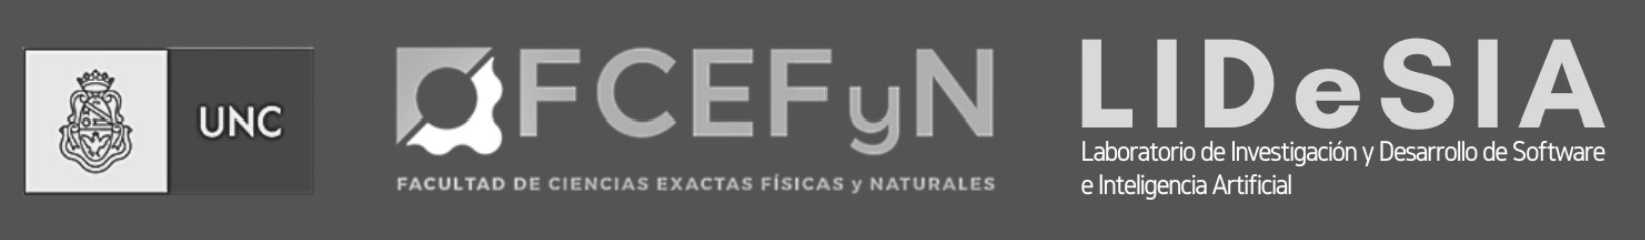



---


# **ENTORNO DE TRABAJO**


---
Tutorial de Google Colab:

[Entorno Colab 1](https://colab.research.google.com/drive/17uy0s5-kKQ8TW-ab6Ny48jwt33XN20F7)

[Entorno Colab 2](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

[Entorno Colab 3](https://colab.research.google.com/notebooks/intro.ipynb)


Informacion adicional:

[Colab Ultralytics](https://colab.research.google.com/github/ultralytics/ultralytics/blob/main/examples/tutorial.ipynb#scrollTo=4JnkELT0cIJg)



---


# **GitHub**

---

## https://github.com/Proyecto-CYTED/CAPACITACION-LIDeSIA.git

---


# **Clonación de pesos sinápticos desde el repositorio**

---

In [1]:
!git clone https://github.com/Proyecto-CYTED/CAPACITACION-LIDeSIA.git

Cloning into 'CAPACITACION-LIDeSIA'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 40 (delta 4), reused 6 (delta 0), pack-reused 21 (from 2)
Receiving objects: 100% (40/40), 60.04 MiB | 13.64 MiB/s, done.
Resolving deltas: 100% (5/5), done.




---


## **INSTALACIÓN DE RECURSOS**


---



## Se adquiere recursos de almacenamiento, se instalan librerias y conectamos con google drive

In [2]:
#Verificar acceso a GPU/TPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
# Instalamos Ultralytics y otras librerías relevantes
!pip install -q ultralytics ipywidgets gradio

# Librería para el manejo de datos en memoria
import os
#Librerías para visualización
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
#Librerias numericas
import numpy as np
#Librerias de manejo de imagenes
from PIL import Image
import cv2


from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.



---


# **CONFIGURACIÓN DEL PROYECTO**


---



## En esta celda se establecen parámentros generales para la configuración del proyecto

In [4]:
DRIVE_MOUNTPOINT = '/content/CAPACITACION-LIDeSIA/clase_1/'
WEIGHT_PATH = os.path.join(DRIVE_MOUNTPOINT, 'pesos.pt')
IMAGE_FOLDER = os.path.join(DRIVE_MOUNTPOINT, 'imagenes_inferencia')
OUTPUT_FOLDER = os.path.join(DRIVE_MOUNTPOINT, 'Predicciones_CYTED')
os.makedirs(OUTPUT_FOLDER, exist_ok=True)



---


# **MODELO**


---



### Informacion adicional: [Ultralytics Docs](https://docs.ultralytics.com/modes/predict/)

### Cargamos el modelo, este modelo reconoce las etiquetas "copa_seca", "caído" y "copa_viva"

In [5]:
# Cargar el modelo entrenado propio
MODEL = YOLO(WEIGHT_PATH)

# (Opcional) Cargar modelo pre-entrenado de Ultralytics (COCO dataset)
PRETRAINED_MODEL = YOLO('yolov8n.pt')


---


# **CARGA DE IMAGEN**


---


### En esta celda se realiza la carga de imagenes a inferir.

In [6]:
def load_images_from_folder(folder, exts=('.png', '.jpg', '.jpeg')):
    """Carga todas las imágenes de una carpeta como objetos PIL.Image"""
    images = dict()
    for file in os.listdir(folder):
        if file.lower().endswith(exts):
            path = os.path.join(folder, file)
            try:
                img = Image.open(path).convert('RGB')
                images[file] = img
                print(f"Imagen cargada: {file}")
            except Exception as e:
                print(f"Error cargando {file}: {e}")
    return images

all_loaded_images = load_images_from_folder(IMAGE_FOLDER)

Imagen cargada: imagen (3).JPG
Imagen cargada: imagen (4).JPG
Imagen cargada: imagen (5).jpg
Imagen cargada: imagen (1).jpeg
Imagen cargada: imagen (2).jpg
Imagen cargada: imagen (6).jpg
Imagen cargada: imagen (1).jpg



---


# **Inferencia y visualización con modelo propio**


---



0: 640x640 34 copa_secas, 5 caidos, 3 copa_vivas, 1825.3ms
Speed: 11.7ms preprocess, 1825.3ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)


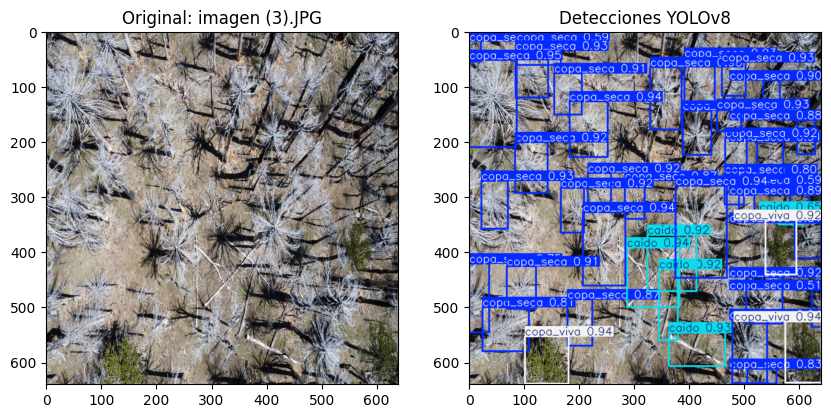


0: 640x640 12 copa_secas, 15 caidos, 14 copa_vivas, 2106.5ms
Speed: 4.7ms preprocess, 2106.5ms inference, 7.3ms postprocess per image at shape (1, 3, 640, 640)


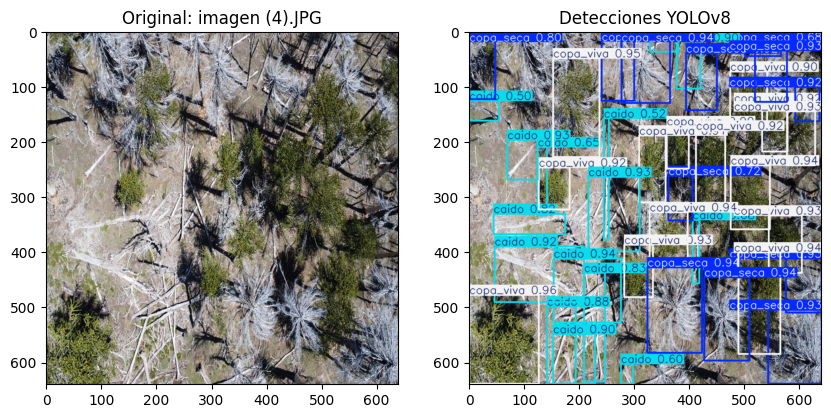


0: 640x640 24 copa_secas, 7 caidos, 11 copa_vivas, 4078.8ms
Speed: 4.0ms preprocess, 4078.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


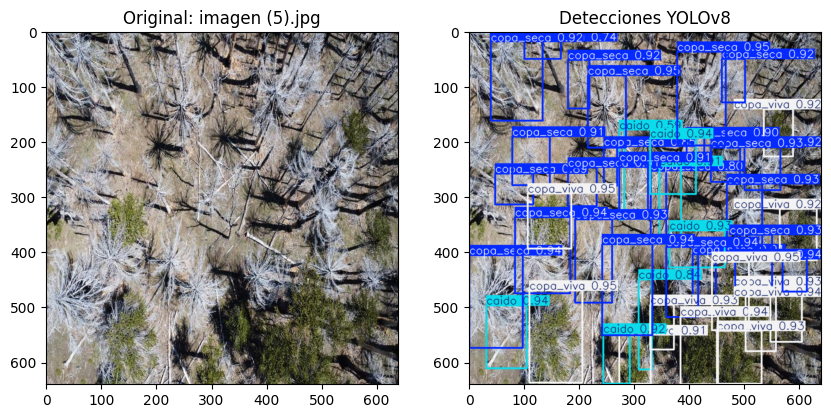


0: 640x640 1 caido, 1752.2ms
Speed: 4.8ms preprocess, 1752.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


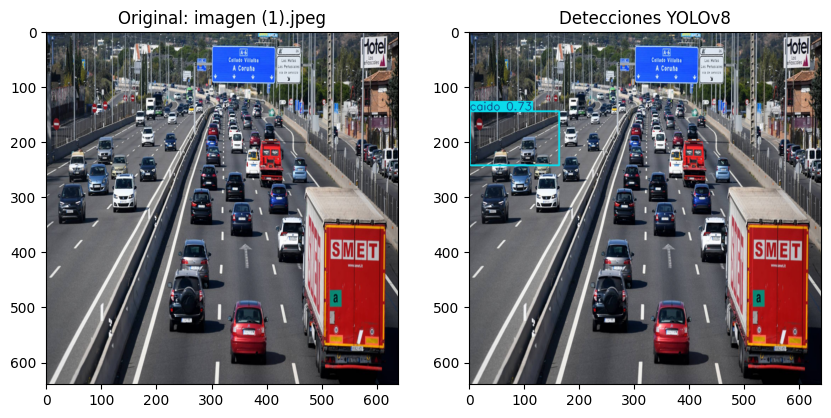


0: 640x640 1 copa_viva, 1798.2ms
Speed: 4.5ms preprocess, 1798.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


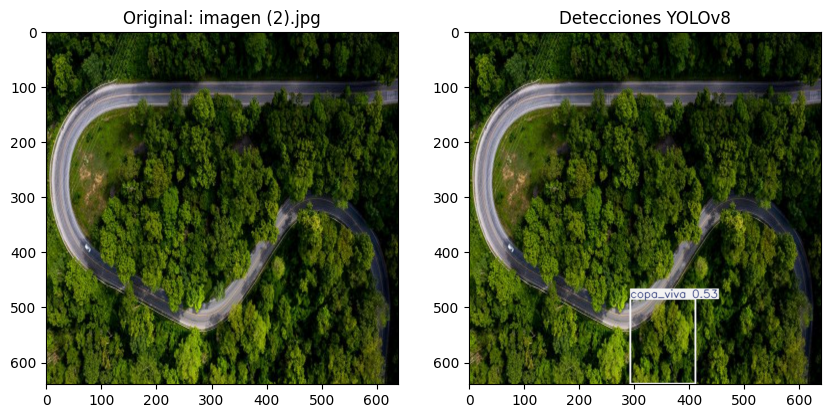


0: 640x640 (no detections), 1741.6ms
Speed: 5.0ms preprocess, 1741.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


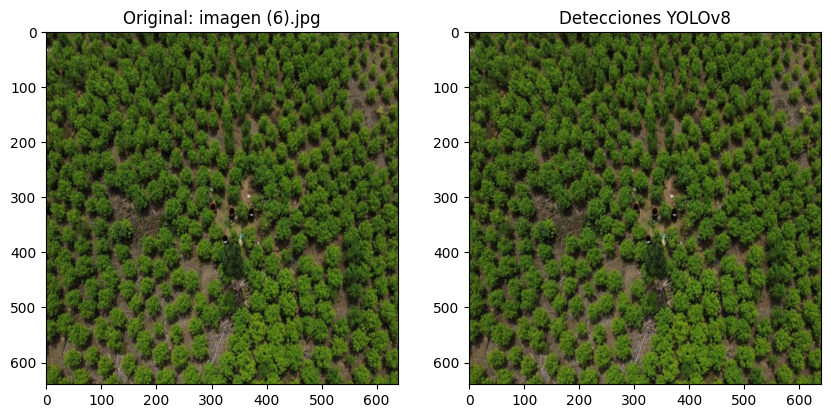


0: 640x640 1 caido, 6 copa_vivas, 1691.7ms
Speed: 9.6ms preprocess, 1691.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


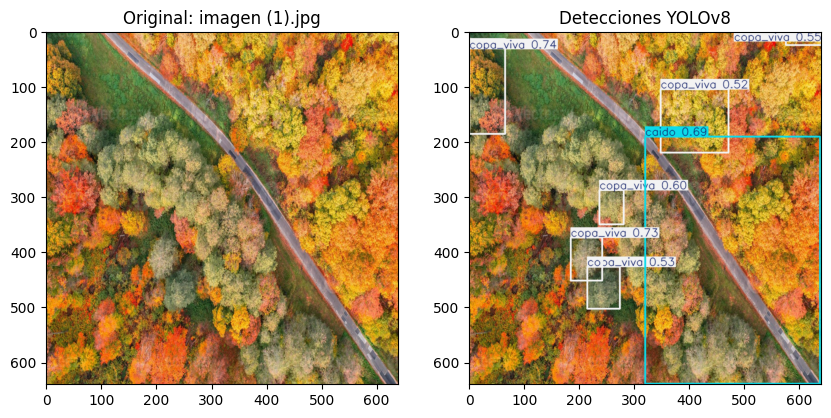

In [9]:
IMAGE_SIZE = 640  # Tamaño estándar YOLOv8

total_class_count = dict()
for name, img in all_loaded_images.items():
    img_resized = img.resize((IMAGE_SIZE, IMAGE_SIZE))
    # Inferencia
    results = MODEL.predict(img_resized, show=False, imgsz=IMAGE_SIZE, conf=0.5)
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img_resized)
    axs[0].set_title(f'Original: {name}')
    for r in results:
        im_bgr = r.plot()
        im_rgb = Image.fromarray(im_bgr[..., ::-1])
        axs[1].imshow(im_rgb)
        axs[1].set_title('Detecciones YOLOv8')
        # Conteo de clases
        for index_class in r.boxes.cls:
            class_name = r.names[int(index_class)]
            total_class_count[class_name] = total_class_count.get(class_name, 0) + 1
    plt.show()




---


# **REPORTE**


---



In [10]:
display(Markdown('### Resultados totales por clase detectada:'))
print(f'{"Clase":<30}{"Cantidad":>10}')
print('-'*40)
for name, count in total_class_count.items():
    print(f'{name:<30}{count:>10}')

### Resultados totales por clase detectada:

Clase                           Cantidad
----------------------------------------
copa_seca                             70
copa_viva                             35
caido                                 29


# **Inferencia con modelo pre-entrenado (COCO)**


### Inferencia con modelo pre-entrenado (YOLOv8 COCO)


0: 640x640 (no detections), 276.1ms
Speed: 2.6ms preprocess, 276.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


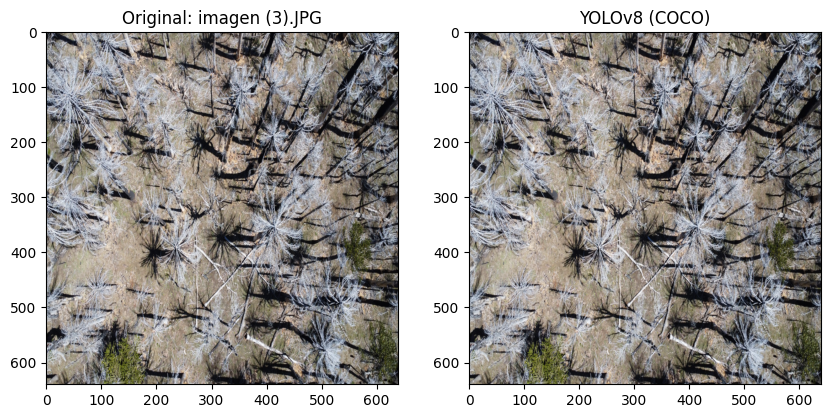


0: 640x640 (no detections), 250.6ms
Speed: 4.2ms preprocess, 250.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


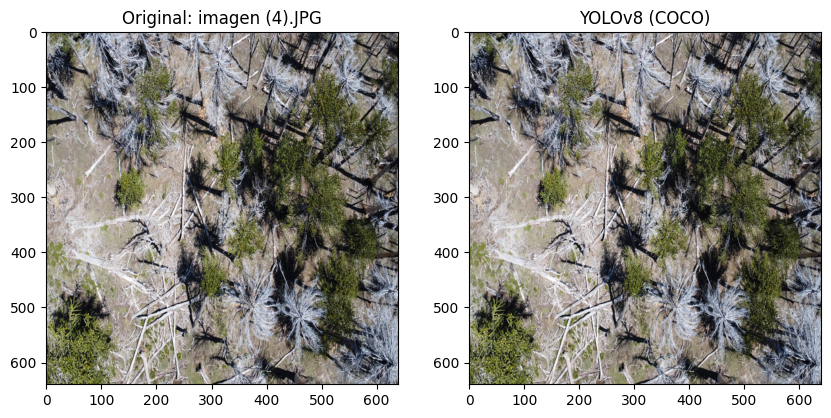


0: 640x640 (no detections), 308.0ms
Speed: 7.5ms preprocess, 308.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


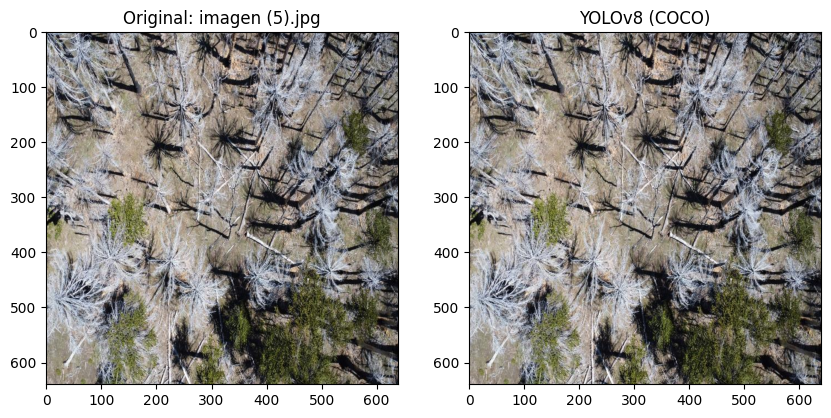


0: 640x640 12 cars, 1 bus, 1 truck, 306.4ms
Speed: 6.6ms preprocess, 306.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


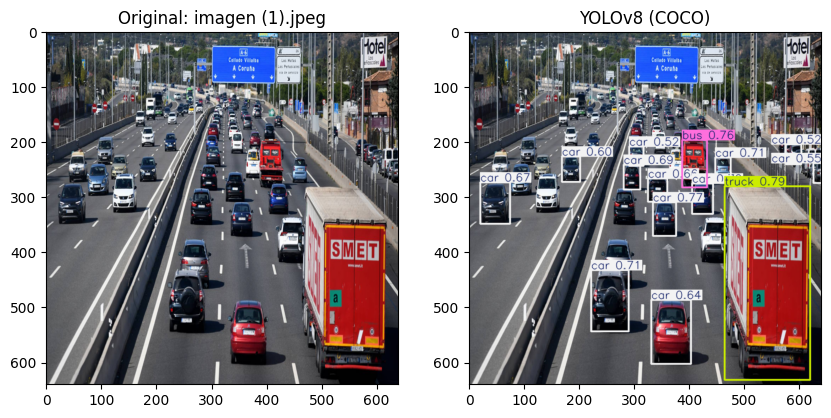


0: 640x640 (no detections), 296.7ms
Speed: 4.7ms preprocess, 296.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


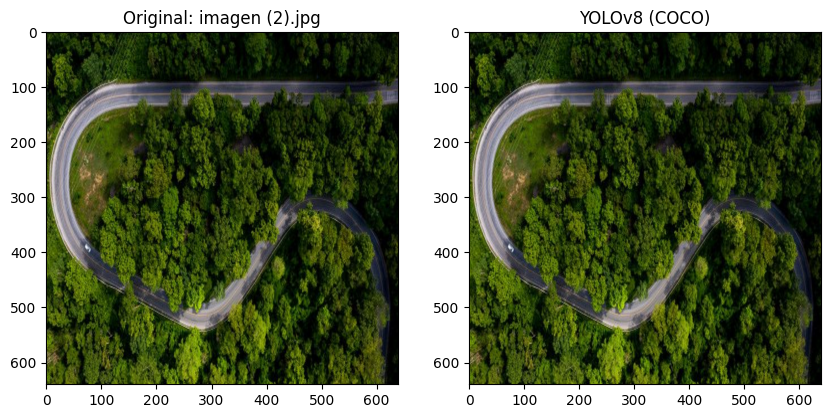


0: 640x640 (no detections), 294.0ms
Speed: 4.8ms preprocess, 294.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


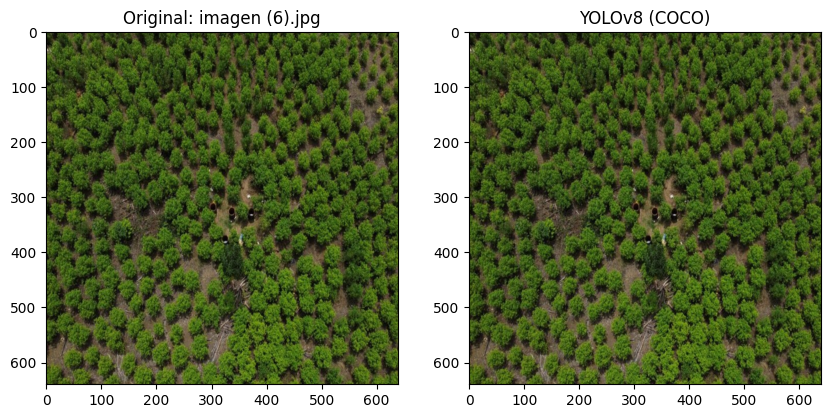


0: 640x640 (no detections), 302.4ms
Speed: 4.6ms preprocess, 302.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


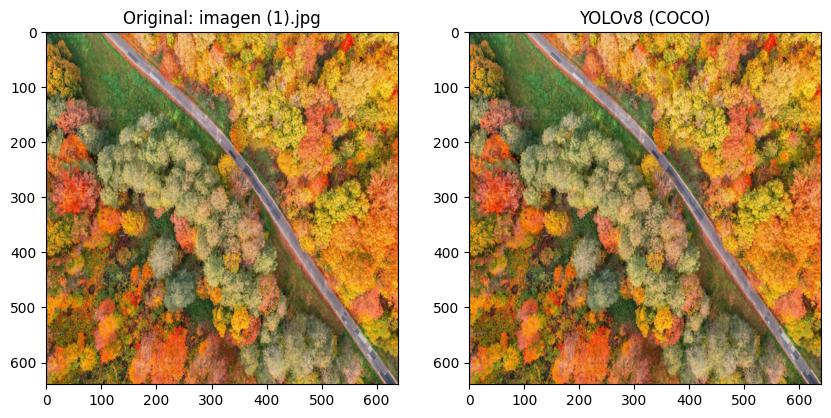

In [11]:
display(Markdown("### Inferencia con modelo pre-entrenado (YOLOv8 COCO)"))
for name, img in all_loaded_images.items():
    img_resized = img.resize((IMAGE_SIZE, IMAGE_SIZE))
    results = PRETRAINED_MODEL.predict(img_resized, show=False, imgsz=IMAGE_SIZE, conf=0.50)
    for r in results:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(img_resized)
        axs[0].set_title(f'Original: {name}')
        im_bgr = r.plot()
        im_rgb = Image.fromarray(im_bgr[..., ::-1])
        axs[1].imshow(im_rgb)
        axs[1].set_title('YOLOv8 (COCO)')
        plt.show()

# **Interfaz interactiva con Gradio (opcional)**

In [13]:
import gradio as gr

def infer_and_plot(img):
    resized = img.resize((IMAGE_SIZE, IMAGE_SIZE))
    results = MODEL.predict(resized, show=False, imgsz=IMAGE_SIZE, conf=0.5)
    for r in results:
        im_bgr = r.plot()
        im_rgb = Image.fromarray(im_bgr[..., ::-1])
        return im_rgb

gr.Interface(
    fn=infer_and_plot,
    inputs=gr.Image(type="pil", label="Sube una imagen de entrada"),
    outputs=gr.Image(type="pil", label="Resultados con detección"),
    title="Demo YOLOv8 Ultralytics",
    description="Sube una imagen y observa las detecciones del modelo personalizado."
).launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://30a0af8a9d61e4c1b5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://30a0af8a9d61e4c1b5.gradio.live
